# 🚢 Will They Survive? - Titanic Survival Prediction with Logistic Regression

## 🧩 Problem Statement:

You're part of a data science team working with historical maritime data to uncover patterns behind survival in one of the most infamous disasters in history — **the Titanic**. Your objective is to build a classification model using logistic regression to predict whether a passenger survived the Titanic tragedy based on features such as age, sex, class, fare, and family connections.

By analyzing this data, you aim to uncover how socioeconomic status, demographics, and travel circumstances affected survival chances, ultimately creating an interpretable and accurate model that generalizes well to unseen passenger data.

## 📊 Dataset Details:

The dataset has been split into two groups:

- **Training Set (Titanic_train.csv)** – Contains the labeled data you’ll use to train your model (with the Survived column).
- **Test Set (Titanic_test.csv)** – Contains similar features but without the Survived label. You'll generate predictions for this dataset.

- **Target Variable:** Survived	(Whether the passenger survived) where; 0 = No, 1 = Yes

## 🧬 Features:

| Column   | Description                                      | Type                  | Notes                                                                 |
|----------|--------------------------------------------------|-----------------------|-----------------------------------------------------------------------|
| Pclass   | Ticket class (proxy for socio-economic status)   | Categorical (Ordinal) | 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)                    |
| Sex      | Gender of the passenger                          | Categorical           | male / female                                                         |
| Age      | Age in years                                     | Numerical             | May contain missing values; fractional if < 1                         |
| SibSp    | Number of siblings/spouses aboard                | Numerical             |                                                                       |
| Parch    | Number of parents/children aboard                | Numerical             |                                                                       |
| Ticket   | Ticket number                                    | Text                  | Might not be directly useful without transformation                   |
| Fare     | Fare paid by the passenger                       | Numerical             |                                                                       |
| Cabin    | Cabin number                                     | Text                  | Many missing values; may be useful if grouped                         |
| Embarked | Port of embarkation                              | Categorical           | C = Cherbourg, Q = Queenstown, S = Southampton                        |


## 📦 Dataset Size:

| Dataset    | Rows | Columns                 |
|------------|------|-------------------------|
| Train Set  | 891  | 12 (including target)   |
| Test Set   | 418  | 11 (excluding target)   |


<hr>

## Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Load Data

In [2]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

print("Train set shape:", train_df.shape)
train_df.head()

Train set shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("\nTest set shape:", test_df.shape)
test_df.head()


Test set shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploring Data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(f"Missing Data in Training data:\n{train_df.isnull().sum()}", end="\n\n")
print(f"Missing Data in Test data:\n{test_df.isnull().sum()}")

Missing Data in Training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Data in Test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**In train data:**
- Age: 177 values
- Cabin: 687 values
- Embarked: 2 values

**In test data:**
- Age: 86 values
- Cabin: 327 values
- Fair: 1 values

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

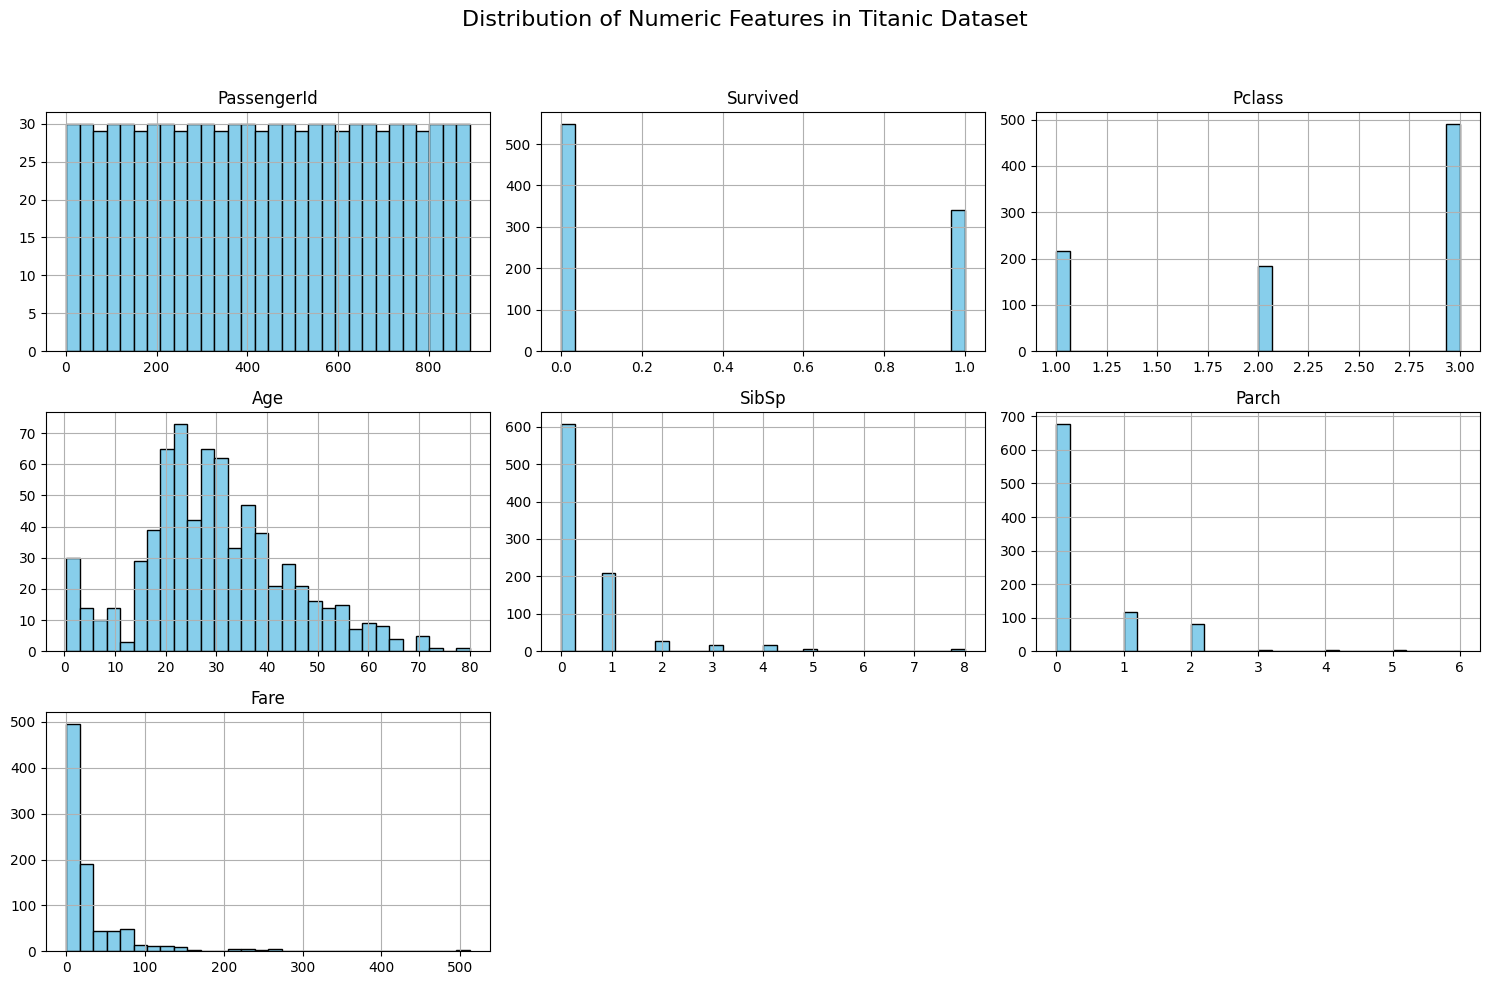

In [10]:
# Plot histogram for each numeric column
train_df.hist(bins=30, figsize=(15, 10), edgecolor='black', color='skyblue')
plt.suptitle('Distribution of Numeric Features in Titanic Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Preprocessing data

### Handling missing values

**In train data:**
- Age: 177 values
- Cabin: 687 values
- Embarked: 2 values

**In test data:**
- Age: 86 values
- Cabin: 327 values
- Fair: 1 values

imputing **median** for `Age` as numerical values, **mode** for `Embarked` as categorical values and **droping** `Cabin` as most of the values are missing. 

imputing the **median fare by Pclass** in missing `fare`. also droping `PassengerId`

In [11]:
age_median = train_df['Age'].median()
train_df['Age'] = train_df['Age'].fillna(age_median)
test_df['Age'] = test_df['Age'].fillna(age_median)

embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(embarked_mode)
test_df['Embarked'] = test_df['Embarked'].fillna(embarked_mode)

train_df.drop(columns=['Cabin', 'PassengerId'], inplace=True)
test_df.drop(columns=['Cabin', 'PassengerId'], inplace=True)

# Impute missing Fare in test set using median Fare by Pclass
missing_fare_index = test_df[test_df['Fare'].isnull()].index[0]
pclass = test_df.loc[missing_fare_index, 'Pclass']
fare_median = test_df[test_df['Pclass'] == pclass]['Fare'].median()

test_df.loc[missing_fare_index, 'Fare'] = fare_median

In [12]:
print(f"Missing Data in Training data:\n{train_df.isnull().sum()}", end="\n\n")
print(f"Missing Data in Test data:\n{test_df.isnull().sum()}")

Missing Data in Training data:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Missing Data in Test data:
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


### Extracting Titles

In the dataset, passenger names follow this pattern: `LastName, Title. FirstName`
we will extract Title from this.

In [13]:
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

train_df['title'] = train_df['Name'].apply(extract_title)
test_df['title'] = test_df['Name'].apply(extract_title)

print("Train Titles:\n", train_df['title'].value_counts())
print("\nTest Titles:\n", test_df['title'].value_counts())

Train Titles:
 title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

Test Titles:
 title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


### Group titles

To simplify analysis and reduce the number of unique categories, we extract titles and group rare or similar ones together:
- `Mlle` and `Ms` → **Miss**
- `Mme` → **Mrs**
- `Capt`, `Col`, `Major` → **Officer**
- `Dr`, `Rev` → **Professional**
- `Sir`, `Lady`, `Don`, `the Countess`, `Jonkheer`, `Dona` → **Royalty**
- Rest remains same

This grouping reduces noise from uncommon titles and improves model generalization by consolidating related social roles.

In [14]:
# Mapping dictionary
title_mapping = {
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Professional",
    "Rev": "Professional",
    "Sir": "Royalty",
    "Lady": "Royalty",
    "Don": "Royalty",
    "Jonkheer": "Royalty",
    "the Countess": "Royalty",
    "Dona": "Royalty"
}

# Apply mapping
train_df['title'] = train_df['title'].replace(title_mapping)
test_df['title'] = test_df['title'].replace(title_mapping)

# Check the new title counts
print("Cleaned Train Titles:\n", train_df['title'].value_counts())
print("\nCleaned Test Titles:\n", test_df['title'].value_counts())

Cleaned Train Titles:
 title
Mr              517
Miss            185
Mrs             126
Master           40
Professional     13
Royalty           5
Officer           5
Name: count, dtype: int64

Cleaned Test Titles:
 title
Mr              240
Miss             79
Mrs              72
Master           21
Professional      3
Officer           2
Royalty           1
Name: count, dtype: int64


### isVIP

In [15]:
zero_fare_passengers = train_df[train_df['Fare'] == 0][['Name', 'Fare', 'Ticket', 'Age', 'Pclass', 'title']]
zero_fare_passengers

,Name,Fare,Ticket,Age,Pclass,title
179,"Leonard, Mr. Lionel",0.0,LINE,36.0,3,Mr
263,"Harrison, Mr. William",0.0,112059,40.0,1,Mr
271,"Tornquist, Mr. William Henry",0.0,LINE,25.0,3,Mr
277,"Parkes, Mr. Francis ""Frank""",0.0,239853,28.0,2,Mr
302,"Johnson, Mr. William Cahoone Jr",0.0,LINE,19.0,3,Mr
413,"Cunningham, Mr. Alfred Fleming",0.0,239853,28.0,2,Mr
466,"Campbell, Mr. William",0.0,239853,28.0,2,Mr
481,"Frost, Mr. Anthony Wood ""Archie""",0.0,239854,28.0,2,Mr
597,"Johnson, Mr. Alfred",0.0,LINE,49.0,3,Mr
633,"Parr, Mr. William Henry Marsh",0.0,112052,28.0,1,Mr


**Observation:**
- Most passengers with `Fare = 0` have the title Mr
But clearly, they aren’t just any random Mr's — many were **employees, crew members, or had connections to Harland & Wolff (Titanic's builders) or the White Star Line**.
- Only one passenger (Jonkheer) has a recognized **VIP title**.
This supports the idea that noble titles alone are not sufficient — we must use Fare data too.
- Common pattern in names or associations (e.g., assistants, companions, staff)
It’s subtle, but strong. For instance:
    - `“Frost, Mr. Anthony Wood ‘Archie’”` was a **billiards marker**
    - `“Campbell, Mr. William”` was likely a **White Star employee**
    - Many of these passengers were **crew or personal staff of VIPs**

**We define a passenger as VIP if:**

Their **Fare is 0** (i.e., they didn’t pay for the ticket)
**OR**
Their title indicates nobility or influential status:
**Royalty**

This captures truly influential passengers who were likely exempted from paying due to their **social status**, **connections**, or **privileged position**.

In [16]:
# isVIP: Passenger is considered VIP if title is 'Royalty' or Fare is 0
train_df['isVIP'] = (
    (train_df['title'] == 'Royalty') | 
    (train_df['Fare'] == 0)
).astype(int)

test_df['isVIP'] = (
    (test_df['title'] == 'Royalty') | 
    (test_df['Fare'] == 0)
).astype(int)

print("Cleaned Train Titles:\n", train_df['isVIP'].value_counts())
print("\nCleaned Test Titles:\n", test_df['isVIP'].value_counts())

Cleaned Train Titles:
 isVIP
0    872
1     19
Name: count, dtype: int64

Cleaned Test Titles:
 isVIP
0    415
1      3
Name: count, dtype: int64


### Age_category

The Age column in the data set is very vercatile so we created an age_category feature that groups passengers into meaningful age segments. Instead of treating Age as a continuous variable, we categorized it into distinct labels: 
- age < 3: Infant
- age < 13: Child
- age < 18: Teen
- age < 60: Adult
- age > 60: Senior

This transformation helps the model better capture patterns related to survival likelihood based on age-related behaviors and social priorities during the Titanic evacuation.

In [17]:
train_df['Age'].agg(["min", "max", "mean"])

min      0.420000
max     80.000000
mean    29.361582
Name: Age, dtype: float64

In [18]:
def get_age_category(age):
    if age < 3:
        return 'Infant'
    elif age < 13:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

train_df['age_category'] = train_df['Age'].apply(get_age_category)
test_df['age_category'] = test_df['Age'].apply(get_age_category)

print("Cleaned Train Titles:\n", train_df['age_category'].value_counts())
print("\nCleaned Test Titles:\n", test_df['age_category'].value_counts())

Cleaned Train Titles:
 age_category
Adult     752
Child      45
Teen       44
Senior     26
Infant     24
Name: count, dtype: int64

Cleaned Test Titles:
 age_category
Adult     363
Teen       16
Child      15
Senior     14
Infant     10
Name: count, dtype: int64


Now we can drop `age`

In [19]:
train_df.drop(columns=['Age'], inplace=True)
test_df.drop(columns=['Age'], inplace=True)

### Family_size

In [20]:
train_df['surname'] = train_df['Name'].apply(lambda x: x.split(',')[0].strip())
test_df['surname'] = test_df['Name'].apply(lambda x: x.split(',')[0].strip())

In [21]:
surname_counts_train = train_df['surname'].value_counts()
print(f"urname_counts_train:\n{surname_counts_train}", end="\n\n")
train_df['surname_count'] = train_df['surname'].map(surname_counts_train)

surname_counts_test = test_df['surname'].value_counts()
print(f"surname_counts_test:\n{surname_counts_test}", end="\n\n")
test_df['surname_count'] = test_df['surname'].map(surname_counts_test)

urname_counts_train:
surname
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

surname_counts_test:
surname
Davies      4
Asplund     4
Ware        4
Thomas      4
Sage        4
           ..
Spinner     1
Petersen    1
Bowenur     1
McCoy       1
Peter       1
Name: count, Length: 352, dtype: int64



In [22]:
train_df.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,title,isVIP,age_category,surname,surname_count
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,Mr,0,Adult,Braund,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,Mrs,0,Adult,Cumings,1
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss,0,Adult,Heikkinen,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,Mrs,0,Adult,Futrelle,2
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr,0,Adult,Allen,2


In [23]:
immediate_family_train = train_df['Parch'] + train_df['SibSp'] + 1
train_df['family_size'] = np.where(
    train_df['surname_count'] > immediate_family_train,
    immediate_family_train + (train_df['surname_count'] - immediate_family_train),
    immediate_family_train
)

immediate_family_test = test_df['Parch'] + test_df['SibSp'] + 1
test_df['family_size'] = np.where(
    test_df['surname_count'] > immediate_family_test,
    immediate_family_test + (test_df['surname_count'] - immediate_family_test),
    immediate_family_test
)

In [24]:
print(f"family_size count for Training data{train_df['family_size'].value_counts()}", end="\n\n")
print(f"family_size count for Test data{test_df['family_size'].value_counts()}")

family_size count for Training datafamily_size
1     454
2     175
3     130
4      57
6      34
5      15
9       9
11      7
8       6
7       4
Name: count, dtype: int64

family_size count for Test datafamily_size
1     219
2      96
3      56
4      27
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64


Now we can drop `name`, `Parch`, `SibSp`, `surname`, `surname_count`

In [25]:
train_df.drop(columns=['Name', 'Parch', 'SibSp', 'surname', 'surname_count'], inplace=True)
test_df.drop(columns=['Name', 'Parch', 'SibSp', 'surname', 'surname_count'], inplace=True)

In [26]:
train_df.head()

,Survived,Pclass,Sex,Ticket,Fare,Embarked,title,isVIP,age_category,family_size
0,0,3,male,A/5 21171,7.2500,S,Mr,0,Adult,2
1,1,1,female,PC 17599,71.2833,C,Mrs,0,Adult,2
2,1,3,female,STON/O2. 3101282,7.9250,S,Miss,0,Adult,1
3,1,1,female,113803,53.1000,S,Mrs,0,Adult,2
4,0,3,male,373450,8.0500,S,Mr,0,Adult,2


Droping the `Ticket` and `Embarked` column as it's not that muck of use.

In [27]:
train_df.drop(columns=['Ticket', 'Embarked'], inplace=True)
test_df.drop(columns=['Ticket', 'Embarked'], inplace=True)

In [28]:
train_df.head()

,Survived,Pclass,Sex,Fare,title,isVIP,age_category,family_size
0,0,3,male,7.2500,Mr,0,Adult,2
1,1,1,female,71.2833,Mrs,0,Adult,2
2,1,3,female,7.9250,Miss,0,Adult,1
3,1,1,female,53.1000,Mrs,0,Adult,2
4,0,3,male,8.0500,Mr,0,Adult,2


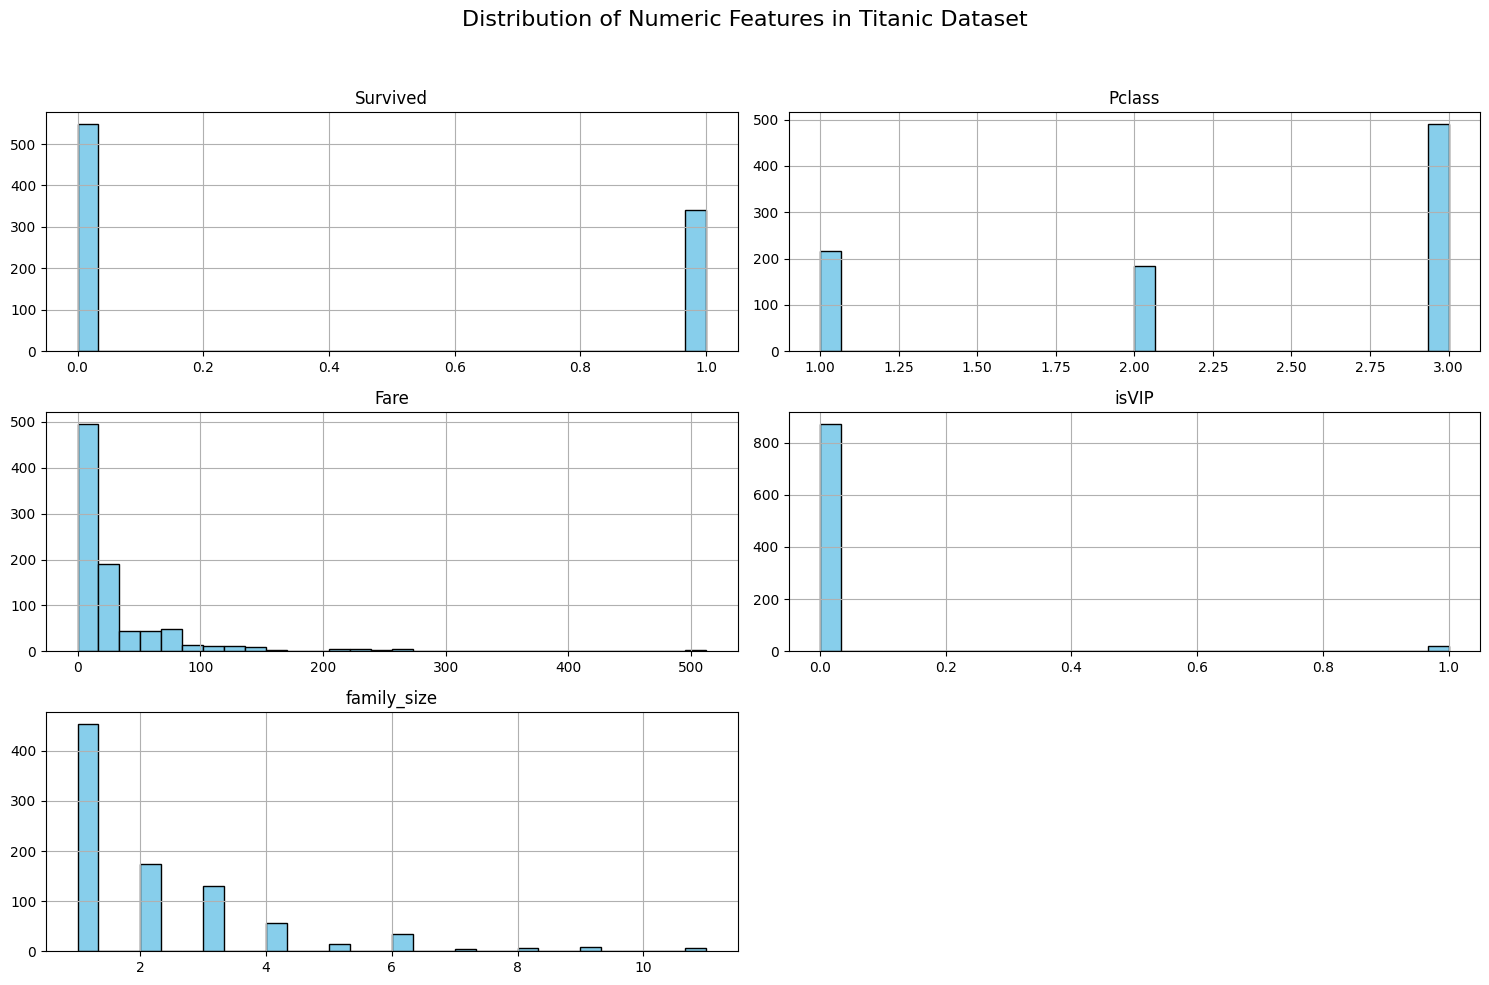

In [29]:
# Plot histogram for each numeric column
train_df.hist(bins=30, figsize=(15, 10), edgecolor='black', color='skyblue')
plt.suptitle('Distribution of Numeric Features in Titanic Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

             Survived    Pclass      Fare     isVIP  family_size
Survived     1.000000 -0.338481  0.257307 -0.052605     0.005574
Pclass      -0.338481  1.000000 -0.549500 -0.101010     0.082585
Fare         0.257307 -0.549500  1.000000 -0.062747     0.176408
isVIP       -0.052605 -0.101010 -0.062747  1.000000    -0.040676
family_size  0.005574  0.082585  0.176408 -0.040676     1.000000


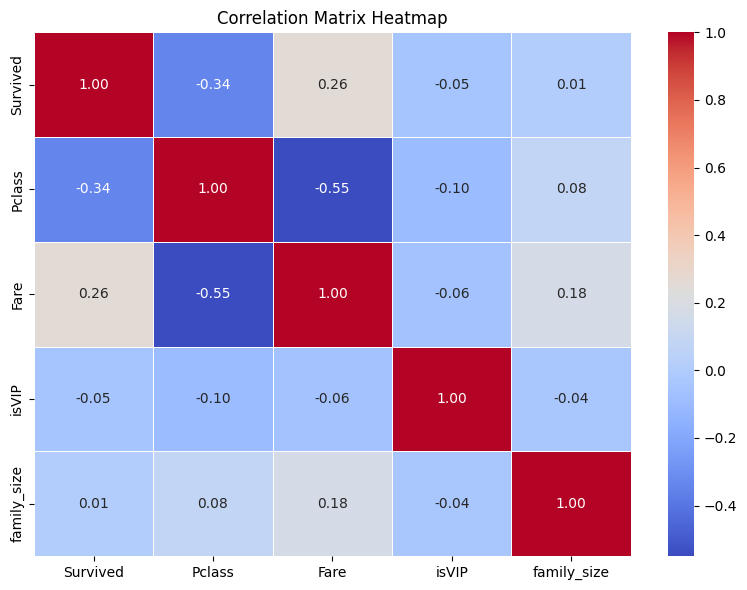

In [30]:
correlation_matrix = train_df.corr(numeric_only=True)
print(correlation_matrix)
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title and layout
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## Train Logistic Regression

### Split the data

In [31]:
categorical_features = ['Sex', 'title', 'age_category']
numerical_features = ['Pclass', 'Fare', 'isVIP', 'family_size']

X = train_df[categorical_features + numerical_features]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Encoding Categorical columns

In [32]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_val_cat = encoder.transform(X_val[categorical_features])

# Get encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert to DataFrames
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_feature_names, index=X_train.index)
X_val_cat_df = pd.DataFrame(X_val_cat, columns=encoded_feature_names, index=X_val.index)

# Concatenate encoded categorical and numerical features
X_train_encoded = pd.concat([X_train_cat_df, X_train[numerical_features]], axis=1)
X_val_encoded = pd.concat([X_val_cat_df, X_val[numerical_features]], axis=1)

In [33]:
X_train_encoded.head()

,Sex_male,title_Miss,title_Mr,title_Mrs,title_Officer,title_Professional,title_Royalty,age_category_Child,age_category_Infant,age_category_Senior,age_category_Teen,Pclass,Fare,isVIP,family_size
692,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,56.4958,0,2
481,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0000,1,1
527,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,221.7792,0,1
855,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,9.3500,0,2
801,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,26.2500,0,3


### Traing model

In [34]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_encoded, y_train)

# Predict on validation data
y_pred = log_reg.predict(X_val_encoded)

In [35]:
# Create comparison DataFrame for classification
results = pd.DataFrame({
    "Pclass": X_val["Pclass"].values,
    "Sex": X_val["Sex"].values,
    "Fare": X_val["Fare"].values,
    "Actual Survived": y_val.values,
    "Predicted Survived": y_pred
})

# Show first 10 results
print(results.head(10))


   Pclass     Sex      Fare  Actual Survived  Predicted Survived
0       3    male   24.1500                0                   0
1       3    male   16.1000                0                   0
2       3    male    7.2250                1                   0
3       3    male   14.1083                0                   0
4       3  female   15.5000                1                   1
5       3  female   17.4000                1                   1
6       2  female   13.0000                1                   1
7       1    male   26.5500                0                   1
8       1    male  110.8833                0                   0
9       2    male   26.0000                0                   0


### Evaluation

In [36]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
# Accuracy
accuracy = accuracy_score(y_val, y_pred)
# Precision
precision = precision_score(y_val, y_pred)
# Recall
recall = recall_score(y_val, y_pred)
# F1 Score
f1 = f1_score(y_val, y_pred)


print("Confusion Matrix:\n", conf_matrix, end="\n\n")
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

Confusion Matrix:
 [[100  10]
 [ 22  47]]

Accuracy: 0.8212
Precision: 0.8246
Recall: 0.6812
F1 Score: 0.746


- **Accuracy (82.12%):** The model correctly predicts survival about 82% of the time — great for a baseline.
- **Precision (82.46%):** When the model predicts a passenger survived, it's right ~82% of the time — solid!
- **Recall (68.12%):** Out of all actual survivors, the model is catching about 68% of them. So it misses some survivors.
- **F1 Score (74.6%):** This balances precision and recall, giving a strong overall measure for the model.

## Conclusion:

As part of our analysis on the Titanic dataset, we developed a logistic regression model to predict passenger survival using key features: **Pclass**, **Sex**, **Fare**, **isVIP**, **family_size**, and **age_category**. The goal was to identify how demographic and socioeconomic attributes influenced survival outcomes in one of the most tragic maritime disasters in history.

---

### Model Performance Summary:

- **Confusion Matrix**:

|                  | Predicted: No (0) | Predicted: Yes (1) |
|------------------|-------------------|--------------------|
| **Actual: No (0)**  |        100        |         10         |
| **Actual: Yes (1)** |         22        |         47         |

- **Accuracy**: 82.12%  
- **Precision**: 82.46%  
- **Recall**: 68.12%  
- **F1 Score**: 74.6%

These results indicate that the model performs well overall, with solid precision and a balanced trade-off between false positives and false negatives. It correctly identifies a significant portion of actual survivors while maintaining relatively few false alarms.

---

### Key Insights from Correlation Analysis:

| Feature        | Correlation with Survival | Interpretation |
|----------------|----------------------------|----------------|
| **Pclass**      | -0.34                     | Lower-class passengers had lower survival chances. |
| **Fare**        | +0.26                     | Higher fare (indicative of wealth or class) increased survival odds. |
| **isVIP**       | -0.05                     | The VIP indicator (royalty or zero fare) had minimal correlation with survival. |
| **family_size** | +0.006                    | Surprisingly weak correlation, suggesting family presence alone wasn't a strong survival factor. |

### Overall Conclusion:

The logistic regression model captures important survival patterns, especially influenced by **passenger class and fare**, confirming the impact of socioeconomic status. While being a VIP or traveling with family had minor effects, the most influential predictor remained **class**, aligning with historical accounts of evacuation priorities.

This model offers interpretable, data-driven insights into the survival dynamics aboard the Titanic and sets a strong foundation for further exploration or more complex models.


# Author: Rohan Das

**Junior Engineer at CloudxLab | Alumni of Vivekananda Global University**

*Jaipur, Rajasthan, India*  
📧 Email: [rd555217@gmail.com](mailto:rd555217@gmail.com)  
💻 GitHub: [ROHANDAS2003](https://github.com/ROHANDAS2003)  
🌐 Portfolio: [rohandas2003.com](https://www.rohandas2003.com/)<br>
🌳 Linktree: [mr_RohanDas](https://linktr.ee/mr_RohanDas)

<img src="https://ugc.production.linktr.ee/f9907aa7-25b0-4295-87cb-e88460e512ce_myimage1.png?io=true&size=avatar-v3_0" width="200" height="200" alt="Rohan Das">

---

## About Me

Hello! I'm Rohan Das, a passionate AI & ML enthusiast, Python developer, and full-stack web developer. With a strong foundation in computer applications and hands-on experience in various technologies, I am committed to continuous learning and innovation.

---

## Skills

- **Programming Languages:** ML Basic, Python, SQL, Full-stack web development  
- **Frameworks & Libraries:** Django, Numpy, Pandas, Matplotlib  
- **Tools & Platforms:** Linux, Git, GitHub  

---

## Let's Connect

I'm always open to new opportunities and collaborations. Feel free to reach out to me via email or connect with me on LinkedIn.

[![LinkedIn](https://img.shields.io/badge/LinkedIn-RohanDas-blue)](https://www.linkedin.com/in/mr-rohandas/)

---

*Last updated: April 6, 2025*
